In [1]:
import collections
import numpy as np
import matplotlib.pyplot as plt

In [2]:
num = 9
category = np.array(list(range(num)))
categorical_prob = np.array([1/4, 1/4, 1/8, 1/8, 1/16, 1/16, 1/16, 1/32, 1/32])

In [3]:
print(category)
print(categorical_prob)
print(num == len(category) == len(categorical_prob))
print(np.sum(categorical_prob) == 1)

[0 1 2 3 4 5 6 7 8]
[0.25    0.25    0.125   0.125   0.0625  0.0625  0.0625  0.03125 0.03125]
True
True


In [4]:
sample = 100000
temperatures = [1/2, 1, 2]
mu, beta = 0, 1

discrete = {i:0 for i in range(num)}
for i in range(sample):
    category_gumbel_prob = np.log(categorical_prob) + np.random.gumbel(mu, beta, num)
    discrete[np.argmax(category_gumbel_prob)] += 1

concretes = []
for temperature in temperatures:
    concrete = np.zeros(num)
    for i in range(sample):
        category_gumbel_prob = np.exp((np.log(categorical_prob)+np.random.gumbel(mu, beta, num)) / temperature)
        category_gumbel_prob /= np.sum(category_gumbel_prob)
        concrete += category_gumbel_prob
    concrete = {i:concrete[i] for i in range(num)}
    concretes.append(concrete)

In [5]:
discrete_label, discrete_freq = zip(*discrete.items())
discrete_prob = [freq/sample for freq in discrete_freq]

concretes_pair = []
for concrete in concretes:
    concrete_label, concrete_freq = zip(*concrete.items())
    concrete_prob = [freq/sample for freq in concrete_freq]
    concretes_pair.append((concrete_label, concrete_prob))

Text(0.5, 1.0, 'Concrete - Temp 2')

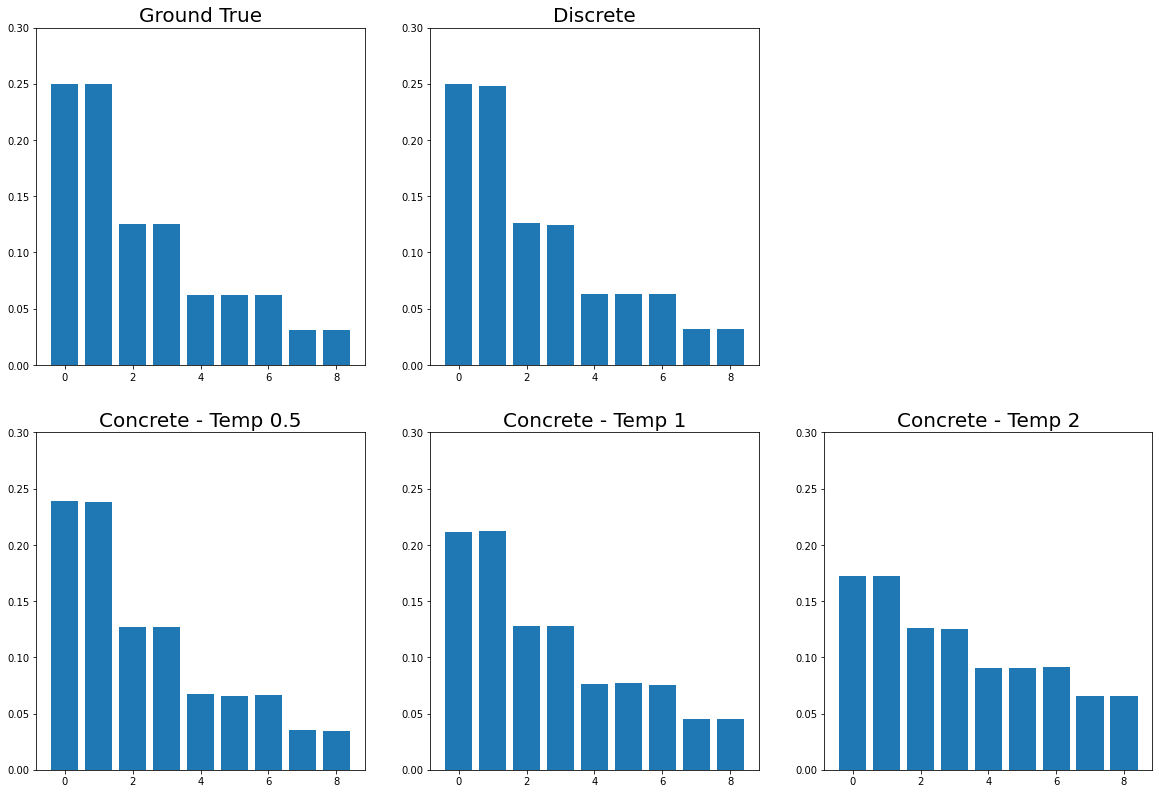

In [6]:
plt.figure(figsize=(20, 36))
plt.rcParams['axes.titlesize'] = 20
plt.axis('off')

plt.subplot(5, 3, 1)
bar = plt.bar(range(num), categorical_prob)
plt.ylim([0, 0.3]); plt.gca().set_title('Ground True')

plt.subplot(5, 3, 2)
bar = plt.bar(discrete_label, discrete_prob)
plt.ylim([0, 0.3]); plt.gca().set_title('Discrete')

plt.subplot(5, 3, 4)
bar = plt.bar(*concretes_pair[0])
plt.ylim([0, 0.3]); plt.gca().set_title('Concrete - Temp 0.5')

plt.subplot(5, 3, 5)
bar = plt.bar(*concretes_pair[1])
plt.ylim([0, 0.3]); plt.gca().set_title('Concrete - Temp 1')

plt.subplot(5, 3, 6)
bar = plt.bar(*concretes_pair[2])
plt.ylim([0, 0.3]); plt.gca().set_title('Concrete - Temp 2')